# Importing important libraries
NumPy ==> it provides support for multi-dimensional arrays usage and some mathematical functions.

Matplotlib ==> plotting library used for visualizations.

Pandas ==> is a data manipulation library that offers functions to work with files as CSV files or Excel sheets.

Seaborn ==> is a data visualization library based on Matplotlib used for creation of visually appealing statistical graphics (used for the correlation graph).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Importing dataset from its directory 
the code reads the insurance data from the specified CSV file and stores it in the DataFrame df.


In [2]:
path = 'C:/Users/ameer/Downloads/Task1/Task1/insurance.csv'
df = pd.read_csv(path)

print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
# printing the shape of the dataset 
print('Number of rows and columns in the data set: ', df.shape)
df.head()

Number of rows and columns in the data set:  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Cleaning the dataset 
The code converts the data of the following columns ('sex', 'smoker', 'region') into numeric data.

In [4]:
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
df['region'] = df['region'].replace({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [5]:
print (df)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       1  16884.92400
1      18    0  33.770         1       0       2   1725.55230
2      28    0  33.000         3       0       2   4449.46200
3      33    0  22.705         0       0       3  21984.47061
4      32    0  28.880         0       0       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       3  10600.54830
1334   18    1  31.920         0       0       4   2205.98080
1335   18    1  36.850         0       0       2   1629.83350
1336   21    1  25.800         0       0       1   2007.94500
1337   61    1  29.070         0       1       3  29141.36030

[1338 rows x 7 columns]


# Correlation plot
Calculating the correlation (the degree of strength for each feature )between features of df and assigning the resulting correlation matrix to the variable corr.
the Seaborn library geneartes a heatmap plot (using heatmap function) where the correlation matrix is passed to it.

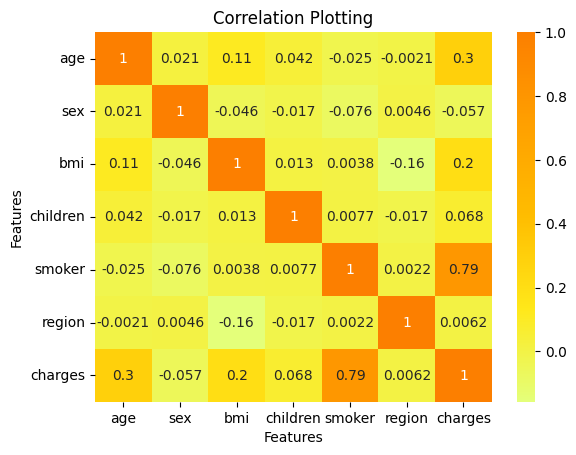

In [6]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

plt.title('Correlation Plotting')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Showing how each features contributes in the target by a certain weight so, smoker, age and bmi show the greatest contribution in the target (charges)
smoker contributes by 79% in the charges, age contributes by 30% in the charges, and bmi contributes by about 20% in the charges and the others showed very low contribution that they could be ignored.

In [7]:
x = df[['age', 'bmi',  'smoker']]
y = df['charges']

print(x)
print(y)

      age     bmi  smoker
0      19  27.900       1
1      18  33.770       0
2      28  33.000       0
3      33  22.705       0
4      32  28.880       0
...   ...     ...     ...
1333   50  30.970       0
1334   18  31.920       0
1335   18  36.850       0
1336   21  25.800       0
1337   61  29.070       1

[1338 rows x 3 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


The train_test_split function used to split the given dataset into training data and testing data to evaluate the model performance

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test ,y_train, y_test = train_test_split(x ,y ,test_size = 0.2, random_state=0)

In [10]:
# Create a linear regression model
model = LinearRegression()

In [11]:
# Fit the model to the data (training the machine learning model)
model.fit(x_train,y_train)

c:\Users\ameer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ameer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ameer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ameer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

LinearRegression()

In [12]:
y_predict = model.predict(x_test)

c:\Users\ameer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ameer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ameer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


The r2_score function is a utility function from the sklearn.metrics known as the R-squared score, for a regression model. The R-squared score is a measure of how well a model fits the data by comparing the predicted values to the actual values.

In [13]:
from sklearn.metrics import r2_score

In [14]:
#computing the model accuracy using the r2-score function
model_accuracy = r2_score(y_test,y_predict)
print (model_accuracy)

0.7945500805653087


c:\Users\ameer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ameer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


# Data visualization
data visualization using a scatter plot

c:\Users\ameer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ameer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ameer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


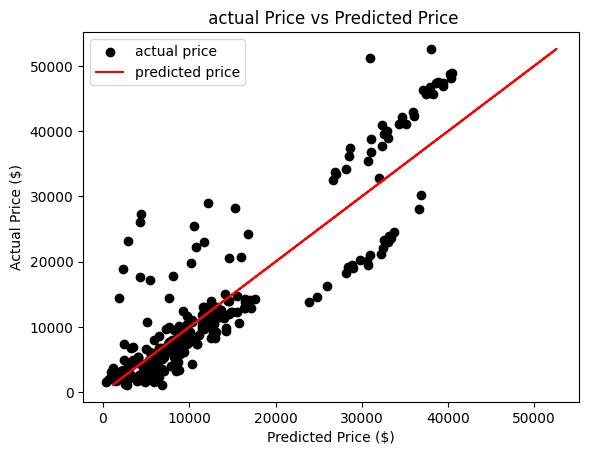

In [15]:
y_predict = model.predict(x_test)

plt.scatter(y_predict, y_test, c='black', label='actual price')
plt.plot(y_test, y_test, c='red', label='predicted price')

plt.title(' actual Price vs Predicted Price')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Actual Price ($)')


plt.legend()
plt.show()